In [ ]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

/home/kira/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


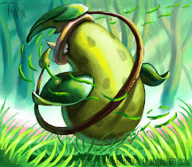

In [4]:
im = PILImage.create('victreebel_test.jpg')
im.thumbnail((192,192))
im

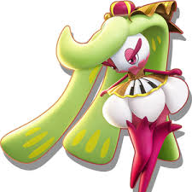

In [5]:
im = PILImage.create('tsareena_test.jpg')
im.thumbnail((192,192))
im

In [6]:
#|export
learn_inf = load_learner('export.pkl')

In [7]:
learn_inf.predict(im)

('tsareena',
 tensor(2),
 tensor([4.4068e-03, 7.3624e-05, 9.6477e-01, 1.8283e-03, 2.8920e-02]))

In [8]:
#|export
categories = ('meganium','torterra','tsareena','venasaur','victreebel')

def classify_image(img):
    pred,idx,probs = learn_inf.predict(img)
    return dict(zip(categories,map(float,probs)))

In [9]:
classify_image(im)

{'meganium': 0.004406783264130354,
 'torterra': 7.362433825619519e-05,
 'tsareena': 0.9647715091705322,
 'venasaur': 0.0018283446552231908,
 'victreebel': 0.028919775038957596}

In [10]:
#|export
image = gr.Image(width=224,height=224)
label = gr.Label()
examples = ['torterra_test.jpg','venasaur_test.jpg','tsareena_test.jpg','victreebel_test.jpg']

intf = gr.Interface(fn=classify_image, inputs = image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [14]:
from nbdev.export import nb_export
nb_export('app.ipynb', '.')